In [66]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)

In [48]:
!head -n5 data/ei_bssi_m_r2/ei_bssi_m_r2_Label.csv

"DATASET: Sentiment indicators - monthly data [ei_bssi_m_r2]"

"LAST UPDATE: 30.10.18 09:35:50"

"EXTRACTION DATE: 12.11.18 02:33:26"


In [151]:
namq_10_gdp = pd.read_csv("data/csvs/namq_10_gdp_1_Data.csv", low_memory=False, usecols=lambda x: x not in ["Flag and Footnotes"]) # GDP and main components
namq_10_fcs = pd.read_csv("data/csvs/namq_10_fcs_1_Data.csv", low_memory=False, usecols=lambda x: x not in ["Flag and Footnotes"]) # Final consumption aggregates
ei_bssi_m_r2 = pd.read_csv("data/csvs/ei_bssi_m_r2_1_Data.csv", low_memory=False, usecols=lambda x: x not in ["Flag and Footnotes"]) # Sentiment indicators - monthly data

In [55]:
namq_10_fcs[["NA_ITEM", "NA_ITEM_LABEL"]].drop_duplicates()

,NA_ITEM,NA_ITEM_LABEL
0,P311_S14,"Final consumption expenditure of households, durable goods"
1,P312_S14,"Final consumption expenditure of households, semi-durable goods"
2,P313_S14,"Final consumption expenditure of households, non-durable goods"
3,P314_S14,"Final consumption expenditure of households, services"


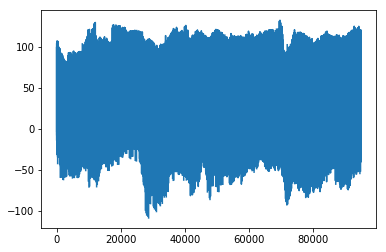

In [64]:
ei_bssi_m_r2.Value.plot()

# Objective - Bottom-up

$$ \widehat{Y_t} = \widehat{C_t}+\widehat{I_t}+\widehat{G_t}+\widehat{X_t}-\widehat{M_t}$$
$$ \widehat{Y_t} = \left( \widehat{Cd_t}+ \widehat{Cndf_t}+ \widehat{Cndnf_t} \right)+ \left( \widehat{Ii_t}+ \widehat{Igfcf_t} \right)+ \widehat{G_t}+\left( \widehat{Xg_t}+ \widehat{Xs_t} \right)+ \left( \widehat{Mg_t}+ \widehat{Ms_t} \right)$$

# $Cd$
$$ \widehat{Cd}_t = \beta_0 + \beta_1 \cdot \widehat{Cd}_{t-1} + \beta_2 \cdot CSMCI_t + \sum_{\textrm{countries} \setminus \textrm{Portugal} } \beta_{\textrm{country}} \cdot D_{\textrm{country}} $$

In [152]:
namq_10_fcs.Value = namq_10_fcs.Value.replace(regex=r'[,]+', value='').astype(np.float)

In [145]:
namq_10_fcs[((namq_10_fcs.NA_ITEM == "P311_S14")&(namq_10_fcs.GEO == "PT")&(namq_10_fcs.UNIT=="CLV_PCH_SM"))].dropna()

,TIME,GEO,GEO_LABEL,UNIT,UNIT_LABEL,S_ADJ,S_ADJ_LABEL,NA_ITEM,NA_ITEM_LABEL,Value
26168,1996Q1,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",8.6
26528,1996Q2,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",-0.8
26888,1996Q3,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",9.1
27248,1996Q4,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",13.4
27608,1997Q1,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",5.6
27968,1997Q2,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",6.9
28328,1997Q3,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",5.5
28688,1997Q4,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",6.5
29048,1998Q1,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",7.7
29408,1998Q2,PT,Portugal,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P311_S14,"Final consumption expenditure of households, durable goods",13.0


In [156]:
namq_10_fcs[((namq_10_fcs.NA_ITEM == "P313_S14")&(namq_10_fcs.UNIT=="CLV_PCH_SM"))].dropna()

,TIME,GEO,GEO_LABEL,UNIT,UNIT_LABEL,S_ADJ,S_ADJ_LABEL,NA_ITEM,NA_ITEM_LABEL,Value
1786,1979Q1,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",4.9
2146,1979Q2,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",2.5
2506,1979Q3,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",2.9
2866,1979Q4,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",5.4
3226,1980Q1,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",4.9
3586,1980Q2,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",0.5
3946,1980Q3,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",-0.1
4306,1980Q4,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",2.4
4438,1981Q1,FR,France,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",-0.5
4666,1981Q1,NO,Norway,CLV_PCH_SM,"Chain linked volumes, percentage change compared to same period in previous year",SCA,Seasonally and calendar adjusted data,P313_S14,"Final consumption expenditure of households, non-durable goods",-5.8


In [157]:
set(namq_10_fcs[(namq_10_fcs.GEO == "PT")].dropna().NA_ITEM_LABEL)

{'Final consumption expenditure of households, durable goods'}

In [155]:
Cd = 

SyntaxError: invalid syntax (<ipython-input-155-6ee48fb0f310>, line 1)